# Transformação de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Base de dados do titanic

### Descrição dos atributos

* survival - sobrevivente (0 - não, 1 - sim)

* pclass - class do passageiro (1 - 1 classe, 2 - 2 classe, 3 - 3 classe)

* name - nome

* sex - sexo (male, female)

* age - idade

* sibsp - numero de irmaos/conjuges a bordo

* parch - numero de pais/filhos a bordo

* ticket - numero do ticket

* fare - tarifa do passageiro

* cabin - cabine

* embarked - porto de embarque (C - Cherbourg, Q - Queenstown, S - Southamption)





In [2]:
titanic_train = pd.read_csv('datasets\\Titanic\\train.csv')

In [3]:
print(f'Dimensões de titanic: \n{titanic_train.shape}\n')
print(f'Campos de titanic: \n{list(titanic_train.keys())}\n')
print(f'Tipos dos dados: \n{titanic_train.dtypes}')

Dimensões de titanic: 
(891, 12)

Campos de titanic: 
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Tipos dos dados: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Estatistica discritiva

In [4]:
print(titanic_train.describe())

PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


In [5]:
categ = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
print('\n', titanic_train[categ].describe(), sep='\n')



                      Name   Sex  Ticket        Cabin Embarked
count                  891   891     891          204      889
unique                 891     2     681          147        3
top     Giglio, Mr. Victor  male  347082  C23 C25 C27        S
freq                     1   577       7            4      644


### Remoção de atributos

Os atributos *survival* (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são uteis e serão mantidos, por exemplo: *Pclass, Sex, Age, SibSp, Parch, Fare* e *Embarked*.

* *PassengerId* é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* *Name* não é util para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o ultimo nome).

* *Ticket* Não identifica o registro e nem descreve o passageiro, por isso, deve ser descartado.

* *Cabin* não identifica bem os passageiros, mas pode ser util utilizarmos o padrão letra+número para descrever os passageiros pelo andar do local da cabine.



In [6]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

In [7]:
print(f'Dimensões de titanic {titanic_train.shape}')

Dimensões de titanic (891, 10)


### Tranasformaçao de variáveis

**Converter número em categorico**

Variáveis categóricas numericamente possuem baixa legibilidade. Portanto, podem ser candidatas a serem recodificadas

In [8]:
titanic_train['Sex'] = titanic_train['Sex'].astype('category')
titanic_train['Embarked'] = titanic_train['Embarked'].astype('category')

In [9]:
# Se a base for usada para competição do kaggle, o atributo alvo, que é o campo 'survived' não deve ser recodificado

new_survived = pd.Categorical(titanic_train['Survived'])
new_survived = new_survived.rename_categories(['Morreu', 'Sobreviveu'])
new_survived

# ou

titanic_train['Survived'] = titanic_train['Survived'].replace({0: 'Morreu', 1: 'Sobreviveu'}).astype('category')

In [10]:
new_pclass = pd.Categorical(titanic_train['Pclass'], ordered=True)
new_pclass = new_pclass.rename_categories(['1aClasse', '2aClasse', '3aClasse'])

titanic_train['Pclass'] = titanic_train['Pclass'].replace({1: '1aClasse', 2: '2aClasse', 3: '3aClasse'}).astype('category')

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 45.8+ KB


In [12]:
print(f'\nTipos de dados \n{titanic_train.dtypes}')
categ = titanic_train.dtypes[titanic_train.dtypes == 'category'].index
print('\n', titanic_train[categ].describe(), '\n')



Tipos de dados 
Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked    category
dtype: object

        Survived    Pclass   Sex Embarked
count       891       891   891      889
unique        2         3     2        3
top      Morreu  3aClasse  male        S
freq        549       491   577      644 



### Converter atributo atraves de processamento de string (usando list comprehension)

No atributo *Cabin*, parece que o padrão letra+número (veja exibição a seguir) indica que uma cabine pertence a algum andar, ou nível. Podemos agrupar o atributo Cabin pela letra inicial da cabine.

In [13]:
print('Valores únicos do atributo cabin', titanic_train['Cabin'].unique(), sep='\n')

char_cabin = titanic_train['Cabin'].astype(str)

new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train['Cabin'] = new_cabin

print('\nValores únicos do atributo cabin', titanic_train['Cabin'].unique(), sep='\n')


Valores únicos do atributo cabin
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Valores ú

### Valores omissos ou inconsistentes

Em atributos numéricos, as possibilidades são:

1. Substituir por zeros

2. Substituir por um valor médio ou mediano

3. Estimar valores usando modelos estatisticos ou preditivos

4. Particionar a base em registros completos e registros incompletos

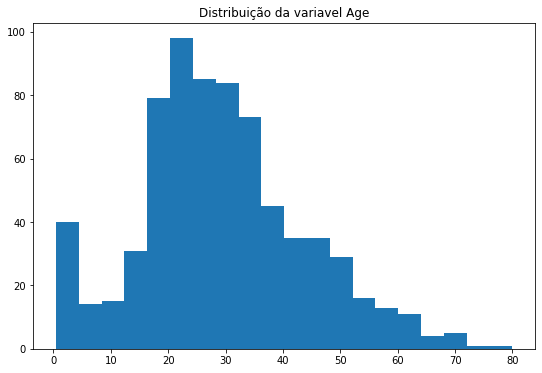

In [16]:
plt.figure(figsize=(9,6))
plt.title('Distribuição da variavel Age')
plt.hist(x= 'Age', bins = 20, data=titanic_train)
plt.show()

O dado possui uma distribuição proxima da distribuiçao normal. Vamos usar a mediana para preencher os valores faltantes

In [21]:
mediana = np.median([el for el in titanic_train['Age'] if np.isnan(el) == False])

new_age = np.where(titanic_train['Age'].isnull(), # condição
                  mediana, # valor se verdadeiro
                  titanic_train['Age']) # valor se falso

# ou

titanic_train['Age'].fillna(value=mediana, inplace=True)


Analise do novo atributo Age

count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64




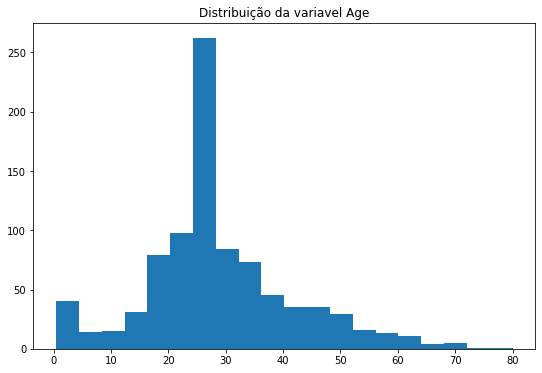

In [24]:
print('\nAnalise do novo atributo Age\n')
print(titanic_train['Age'].describe())

print('\n')

plt.figure(figsize=(9,6))
plt.title('Distribuição da variavel Age')
plt.hist(x= 'Age', bins = 20, data=titanic_train)
plt.show()

### Detecção de outliers

Outliers são valores extremos. A estratística descritiva, em geral, prevê um bom indicativo da presença de outliers, com valores máximos e mínimos muito distante; O valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição de valores.

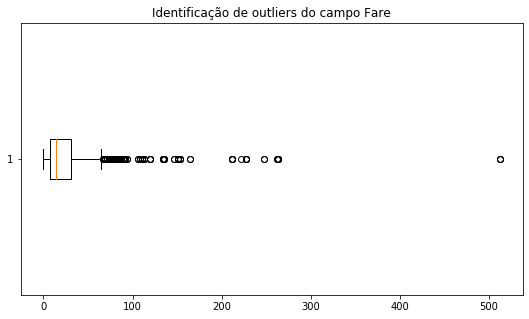

In [31]:
plt.figure(figsize=(9,5))
plt.title('Identificação de outliers do campo Fare')
plt.boxplot(x='Fare', data=titanic_train, vert=False)
plt.show()

In [32]:
titanic_train['Fare'].describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

In [33]:
index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))
print('Registros com valores extremos:', titanic_train.loc[index], sep='\n')

Registros com valores extremos:
       Survived    Pclass                                Name     Sex   Age  \
258  Sobreviveu  1aClasse                    Ward, Miss. Anna  female  35.0   
679  Sobreviveu  1aClasse  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737  Sobreviveu  1aClasse              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked  
258      0      0  512.33     n        C  
679      0      1  512.33     B        C  
737      0      0  512.33     B        C  


### Criando novos atributos

Vamos criar uma nova variável *Family*, que ira, unir, conjuge e irmãos (SibSb) com pais e filhos (Parch)

In [36]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']

most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))

print(f'\nAs maiores familias a bordo {titanic_train.loc[most_family]}')


As maiores familias a bordo     Survived    Pclass                               Name     Sex   Age  \
159   Morreu  3aClasse         Sage, Master. Thomas Henry    male  28.0   
180   Morreu  3aClasse       Sage, Miss. Constance Gladys  female  28.0   
201   Morreu  3aClasse                Sage, Mr. Frederick    male  28.0   
324   Morreu  3aClasse           Sage, Mr. George John Jr    male  28.0   
792   Morreu  3aClasse            Sage, Miss. Stella Anna  female  28.0   
846   Morreu  3aClasse           Sage, Mr. Douglas Bullen    male  28.0   
863   Morreu  3aClasse  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked  Family  
159      8      2  69.55     n        S      10  
180      8      2  69.55     n        S      10  
201      8      2  69.55     n        S      10  
324      8      2  69.55     n        S      10  
792      8      2  69.55     n        S      10  
846      8      2  69.55     n        S      10  
863      8      2  6

Os atributos agora estão redundates, ou muito correlacionados, como podemos ver com a matriz de correlaçãoo. A matriz só funciona com tipos de dados numéricos. Será possível perceber que a variável *Family* terá forte correlação (acima de 0.75) com *SibSb* e *Parch*.

In [38]:
int_fields = titanic_train.dtypes[titanic_train.dtypes == 'int64'].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)
correlacao

,SibSp,Parch,Family
SibSp,1.00,0.41,0.89
Parch,0.41,1.00,0.78
Family,0.89,0.78,1.00


# Base de dados do Gazola de Imoveis em São Paulo

A base possui 14 campos: Um identificador, 11 atributos e 2 rótulos (Cub e Preco $)

In [41]:
gazola = pd.read_excel('datasets\\Gazola_dados_apartamento_resumo.xls', sheet_name=1)

print(f'\nDimensões: {gazola.shape}\n')
print(f'\nCampos: \n{list(gazola.keys())}\n')
print(f'\nTipos de dados:\n{gazola.dtypes}\n')
print(gazola.describe(percentiles=[]))


Dimensões: (397, 14)


Campos: 
['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte', 'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)']


Tipos de dados:
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object

       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.

## Preparando a base para o treinamento

É necessário remover o identificador, retirar o *Cub* e definir o preço como atributo alvo

*train_test_split* irá separar a base em *base de treinamento* e *base de teste* a partir de uma amostragem aleatória.

In [48]:
X = gazola.iloc[:, 1: (gazola.shape[1] - 2)]
y = gazola.iloc[:, (gazola.shape[1] - 1)]

atributos = list(gazola)[1:(gazola.shape[1] - 2)]
rotulos = list(gazola)[(gazola.shape[1] - 1)]

Base de treinamento: (357, 11)
Base de teste: (40, 11)


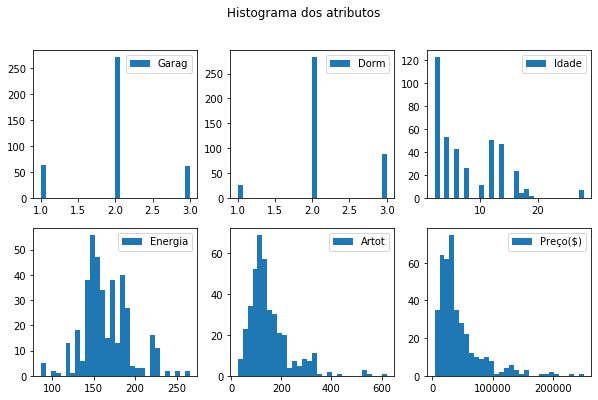

In [53]:
fig, ax = plt.subplots(2,3, figsize=(10,6))
plt.suptitle('Histograma dos atributos')

for i in range(2):
    for j in range(3):
        if j == 2 and i == 1:
            ax[i,j].hist(y.iloc[:], label=rotulos, bins=30)
        else:
            ax[i,j].hist(X.iloc[:, (i*3+j+6)], label=atributos[i*3+j+6], bins = 30)
        ax[i,j].legend()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f'Base de treinamento: {X_train.shape}')
print(f'Base de teste: {X_test.shape}')

## Treinamento com regressão linear

*fit()* realiza o treinamento do modelo

*predict()* aplica o modelo sobre novos dados



Acurácia da base de treinamento 0.92

Acurácia da base de teste 0.82

Descrição do modelo:

w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57'] b: -15469.97

Número de atributos usados 11

Erro percentual:
Média: 0.25 Max: 0.87 Min: 0.00


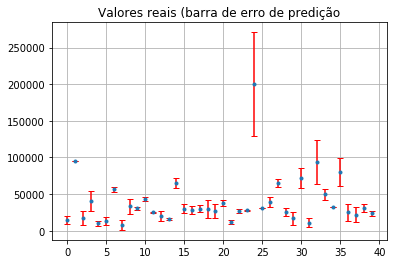

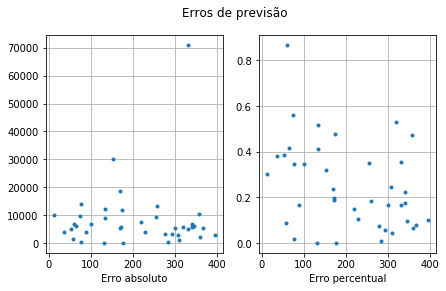

In [67]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print('\nAcurácia da base de treinamento {:.2f}'.format(lnr.score(X_train, y_train)))
print('\nAcurácia da base de teste {:.2f}'.format(lnr.score(X_test, y_test)))


print('\nDescrição do modelo:\n')
s = ['{0}: {1:0.2f}'.format(a, v) for a, v in zip(atributos, lnr.coef_)]

print('w: {} b: {:.2f}'.format(s, lnr.intercept_))
print('\nNúmero de atributos usados {}'.format(np.sum(lnr.coef_ != 0)))


errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('\nErro percentual:\nMédia: {0:.2f} Max: {1:.2f} Min: {2:.2f}'
.format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6,4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr, fmt='.', ecolor='r', capsize=3)
plt.title('Valores reais (barra de erro de predição')
plt.grid()

fix, ax = plt.subplots(1,2,figsize=(7,4))
plt.suptitle('Erros de previsão')
ax[0].plot(errolnr, '.')
ax[0].set_xlabel('Erro absoluto')
ax[0].grid()
ax[1].plot(erroperc, '.')
ax[1].set_xlabel('Erro percentual')
ax[1].grid()

## Transformação de dados numericos

Vamos explorar a transofrmação de dados, para resolver problemas de distribuição e a normalização de dados


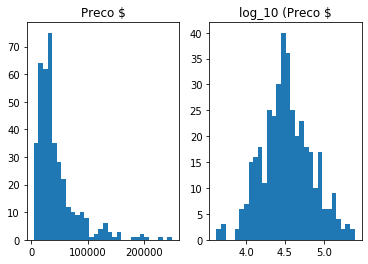

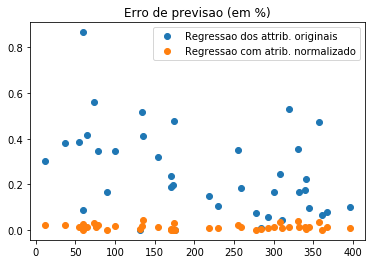


Regressao Linear Normalizada

Acurácia da base de treinamento 0.94

Acurácia da base de teste 0.92

Descrição do modelo:

w: ['DepEmp: 0.06', 'Conserv: 0.11', 'Classif: 0.19', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.08', 'Garag: 0.05', 'Dorm: -0.00', 'Idade: 0.03', 'Energia: -0.16', 'Artot: 1.39'] b: 3.31

Número de atributos usados 11

Comparação dos pesos
Original w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57'] b: -15469.97
Normalizado w: ['DepEmp: 0.06', 'Conserv: 0.11', 'Classif: 0.19', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.08', 'Garag: 0.05', 'Dorm: -0.00', 'Idade: 0.03', 'Energia: -0.16', 'Artot: 1.39'] b: 3.31


In [71]:
# Os atributos possuem faixas de valores diferentes, que influencia os pessos dos coeficientes da regressão. Vamos trabalhar melhor os atributos

X_scale = X

# Iremos aplicar o logaritmo em "Energia Total", "Area total" e "Preco"

X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)

# Normalizaçã Min-Max dos dados
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_scale)
X_scale = min_max_scaler.transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6,4))
ax[0].hist(y, bins=30, label='Preco $')
ax[0].set_title('Preco $')
ax[1].hist(y_scale, bins=30, label = 'log10 Preco $')
ax[1].set_title('log_10 (Preco $')


X_train2 , X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression()
lnr2.fit(X_train2, y_train2)
y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_train2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2

plt.figure(figsize=(6,4))
plt.plot(erroperc, 'o', label='Regressao dos attrib. originais')
plt.plot(errolnr2perc, 'o', label='Regressao com atrib. normalizado')
plt.title('Erro de previsao (em %)')
plt.legend()
plt.show()


print('\nRegressao Linear Normalizada'.center(20, '-'))

print('\nAcurácia da base de treinamento {:.2f}'.format(lnr2.score(X_train2, y_train2)))
print('\nAcurácia da base de teste {:.2f}'.format(lnr2.score(X_test2, y_test2)))


print('\nDescrição do modelo:\n')
s = ['{0}: {1:0.2f}'.format(a, v) for a, v in zip(atributos, lnr2.coef_)]

print('w: {} b: {:.2f}'.format(s, lnr2.intercept_))
print('\nNúmero de atributos usados {}'.format(np.sum(lnr2.coef_ != 0)))

print('\nComparação dos pesos'.center(20, '-'))
s = ['{0}: {1:0.2f}'.format(a, v) for a, v in zip(atributos, lnr.coef_)]

print('Original w: {} b: {:.2f}'.format(s, lnr.intercept_))

s = ['{0}: {1:0.2f}'.format(a, v) for a, v in zip(atributos, lnr2.coef_)]

print('Normalizado w: {} b: {:.2f}'.format(s, lnr2.intercept_))
